# 逻辑回归

In [20]:
import numpy as np

In [21]:
def loadDataSet():
    dataMat = []
    labelMat = []
    with open('testSet.txt','r') as fp:
        lines = fp.readlines()
        for line in lines:
            line = line.strip().split()
            #x0=1.0,x1=line[0],x2=line[1]
            dataMat.append([1.0,float(line[0]),float(line[1])])
            labelMat.append(int(line[2]))
    return dataMat,labelMat

In [22]:
dataSet,labels = loadDataSet()

In [23]:
#list(zip(dataSet,labels))

In [24]:
#sigmoid函数
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

#### 梯度上升算法

In [25]:
#梯度上升寻找决策边界
#alpha,步长
#maxCycle,最大迭代次数
#此处使用mat数据结构是为了进行矩阵运算
def gradAscent(dataSet,labels,alpha = 0.001,maxCycles =500):
    dataMat = np.mat(dataSet)
    labelMat = np.mat(labels).transpose()
    matsize = dataMat.shape
    #print(matsize[0],matsize[1])
    weights = np.ones((matsize[1],1))
    for k in range(maxCycles):
        h = sigmoid(dataMat*weights)
        error = labelMat-h
        #对于error中的每一个元素
        #若为负数则证明label为0，h应向0方向走，即负号方向
        #若为正数则证明label为1，h应向1方向走，即正号方向
        #所以error的方向就是每一项的符号的方向组成的矢量的方向
        weights =weights + alpha*dataMat.transpose()*error
    return weights

In [26]:
weights = gradAscent(dataSet,labels)

#### 画出决策边界

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def plotBestFit(weights,index):
    dataSet,labels = loadDataSet()
    dataArr = np.array(dataSet)
    xcord0 = []
    ycord0 = []
    xcord1 = []
    ycord1 = []
    for i in range(dataArr.shape[0]):
        if labels[i]==0:
            xcord0.append(dataArr[i,1])
            ycord0.append(dataArr[i,2])
        else:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord0,ycord0,s=30,c='red',marker='s')
    ax.scatter(xcord1,ycord1,s=30,c='green')
    x = np.array(list(range(-40,35)))/10
    y = (-weights[0]-weights[1]*x)/weights[2]
    if index ==1:
        ax.plot(x,np.array(y)[0])
    else:
        ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

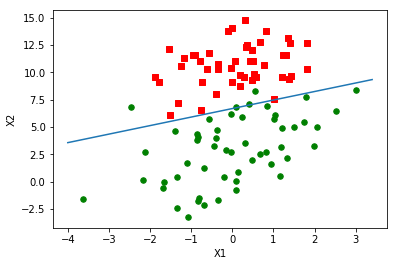

In [29]:
plotBestFit(weights,1)

#### 随机梯度上升算法
* 梯度上升算法需要每次迭代式都对全集进行运算，在大规模数据下的代价无法接受

In [30]:
def stocGradAscent0(dataSet,labels,alpha = 0.01):
    dataArr = np.array(dataSet).astype(float)
    size = dataArr.shape
    weights = np.ones(size[1])
    for i in range(size[0]):
        h = sigmoid(np.sum(dataArr[i]*weights))
        error = labels[i] - h
        weights = weights + alpha*error*dataArr[i]
    return weights

In [31]:
weights2 = stocGradAscent0(dataSet,labels)

In [32]:
weights2

array([ 1.01702007,  0.85914348, -0.36579921])

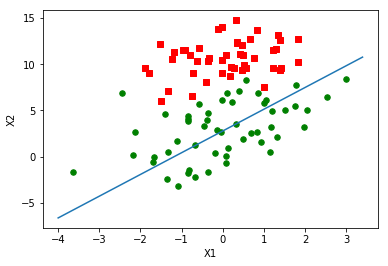

In [33]:
plotBestFit(weights2,2)

#### 改进的随机梯度上升算法
* 增加迭代次数
* 每次改变alpha值，使得alpha随着迭代次数的增加不断减小

In [195]:
def randChoose(series):
    r = int(np.random.uniform(0,len(series)))
    result = series[r]
    del(series[r])
    return result
def stocGradAscent1(dataSet,labels,numIter = 150):
    dataArr = np.array(dataSet)
    size = dataArr.shape
    weights = np.ones(size[1])

    for j in range(numIter):
        dataIndex = list(range(size[0]))
        for i in range(size[0]):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = randChoose(dataIndex)
            h = sigmoid(np.sum(dataArr[randIndex]*weights))
            error = labels[randIndex] - h
            weights = weights + alpha*error*dataArr[randIndex]

    return weights
            

In [196]:
weights3 = stocGradAscent1(dataSet,labels,500)

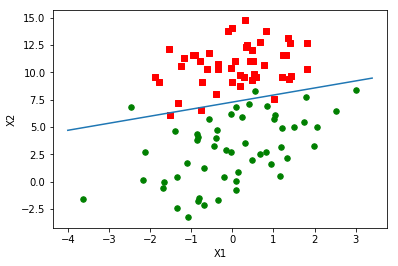

In [197]:
plotBestFit(weights3,2)

#### 分类

In [206]:
def classifyVector(inX,weights):
    prob = sigmoid(np.sum(inX*weights))
    if prob>0.5:
        return 1
    else:
        return 0

### 示例：从疝气病症预测病马的死亡率

In [209]:
def colicTest():
    frTrain = open('horseColicTraining.txt'); frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print ("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [210]:
multiTest()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


the error rate of this test is: 0.388060
the error rate of this test is: 0.268657
the error rate of this test is: 0.283582
the error rate of this test is: 0.268657
the error rate of this test is: 0.328358
the error rate of this test is: 0.492537
the error rate of this test is: 0.283582
the error rate of this test is: 0.432836
the error rate of this test is: 0.268657
the error rate of this test is: 0.283582
after 10 iterations the average error rate is: 0.329851
